## Tensorflow Gradient Boosted Trees 

Notebook for showcasing model usage

In [103]:
import os
import sys
import pandas as pd
# the models dir contains tf_gbt.py
sys.path.append(os.path.join(os.path.abspath(''), "../models"))
from tf_gbt import GradientBoostedTrees

### Model Configurations and Datasets

We wil declare configurations for the model 

In [104]:
data_path = "../data"

output_path = "../submissions"

select_features = ['CryoSleep','Age','RoomService','Cabin_num','FoodCourt', 'ShoppingMall', 'Spa', 'HomePlanet', 'Side', 'Deck', 'Transported', 'VRDeck','Destination','VIP']

label = 'Transported'

Let's load the data set. These datasets have undergone preprocessing into tensorflow datasets

In [105]:
## load train and validation dataset

train_df = pd.read_csv(os.path.join(data_path, "train_ds_pd.csv"))
valid_df = pd.read_csv(os.path.join(data_path, "valid_ds_pd.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test_ds_pd.csv"))

In [106]:
# train_df.columns[train_df.isna().any()].tolist()
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

### Running TensorFlow Gradient Boosted Trees experiments

We will first instantiate the tensorflow GBT model using the predefined configurations and datasets. 

An autotuner will be use selecting the most optimal hyperparameters

In [107]:
gbt = GradientBoostedTrees(train_df=train_df, valid_df=valid_df, test_df=test_df,label=label)
gbt.feature_selection(selected_features=select_features)
gbt.create_tuner(num_trials=50)
gbt.create_gbt_model()

============ Instantiating GBT class ============
============ Pruning Features ============
============ Creating RandomSearch Tuner ============
============ Instantiating GBT model ============
Use /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmpg946jw9q as temporary training directory


[WARNING 23-11-20 16:22:17.2162 +08 gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-20 16:22:17.2187 +08 gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-20 16:22:17.2187 +08 gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [108]:
# run experiment
gbt_model_history = gbt.run_experiments()
print(f"Train Model Accuracy: {gbt_model_history.history['accuracy']}")

# evaluate
gbt_model_evaluation, gbt_model_metrics, gbt_model_classification_report = gbt.evaluate()

============ Running Experiment ============
Reading training dataset...
Training tensor examples:
Features: {'CryoSleep': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Age': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'RoomService': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cabin_num': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'FoodCourt': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'ShoppingMall': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Spa': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'HomePlanet': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Side': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'Deck': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'VRDeck': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'Destination': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'VIP': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>}
Label: Tensor("data_13:0", shape=(None,), dtype=int64)
Weights: None
Normal

Training dataset read in 0:00:00.227229. Found 6938 examples.
Training model...


[INFO 23-11-20 16:22:17.4766 +08 kernel.cc:773] Start Yggdrasil model training
[INFO 23-11-20 16:22:17.4767 +08 kernel.cc:774] Collect training examples
[INFO 23-11-20 16:22:17.4767 +08 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-20 16:22:17.4812 +08 kernel.cc:393] Number of batches: 7
[INFO 23-11-20 16:22:17.4812 +08 kernel.cc:394] Number of examples: 6938
[INFO 23-11-20 16:22:17.4832 +08 data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Deck (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-11-20 16:22:17.4840 +08 kernel.cc:794] Trai

Model trained in 0:02:29.838871
Compiling model...
Model compiled.
Train Model Accuracy: [0.8111273646354675]
============ Evaluating ============


2/2 [==============================] - 0s 4ms/step


Accuracy metric using validation datasets for evaluation

In [109]:
evaluation_accuracy = gbt_model_evaluation['accuracy']
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {evaluation_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.8040


Using sklearn classification report to output common metrics

In [110]:
print(gbt_model_classification_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       894
           1       0.80      0.80      0.80       861

    accuracy                           0.80      1755
   macro avg       0.80      0.80      0.80      1755
weighted avg       0.80      0.80      0.80      1755



In [111]:
gbt_model_predictions, gbt_model_output = gbt.predict()

============ Predicting ============
5/5 [==============================] - 0s 5ms/step
Model: "gradient_boosted_trees_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (13):
	Age
	Cabin_num
	CryoSleep
	Deck
	Destination
	FoodCourt
	HomePlanet
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.          "Age"  0.272615 ################
    2.    "Cabin_num"  0.243353 ###########
    3.    "FoodCourt"  0.233024 #########
    4.  "RoomService"  0.223667 ########
    5.    "CryoSleep"  0.220189 #######
    6.         "Deck"  0.207379 #####
    7.          "Spa"  0.199031 ###
    8. "ShoppingMall"  

### Model Visualisations

Training Logs

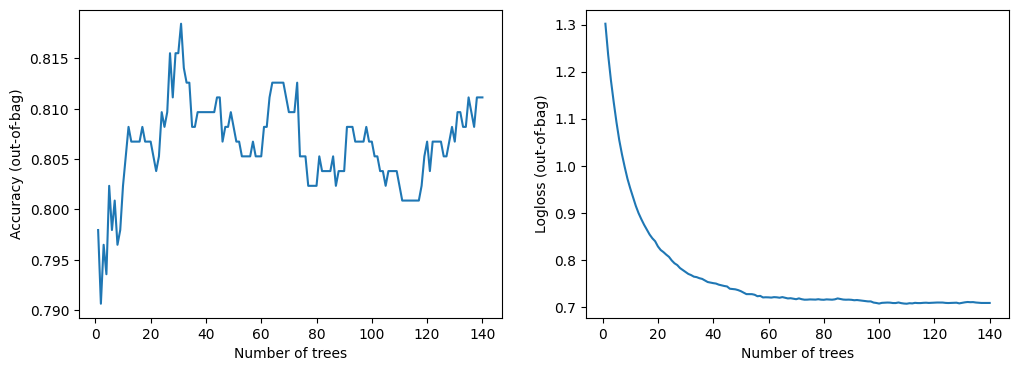

In [112]:
# training logs
gbt_model_training_logs = gbt.plot_training_logs()

Tuning Logs

score                                               -0.706597
evaluation_time                                     45.200335
best                                                     True
split_axis                                     SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                  2.0
sparse_oblique_normalization                          MIN_MAX
sparse_oblique_weights                                 BINARY
categorical_algorithm                                  RANDOM
growing_strategy                            BEST_FIRST_GLOBAL
max_depth                                                 NaN
sampling_method                                        RANDOM
subsample                                                 1.0
shrinkage                                                 0.1
min_examples                                                5
use_hessian_gain                                         true
num_candidate_attributes_ratio                            0.5
max_num_

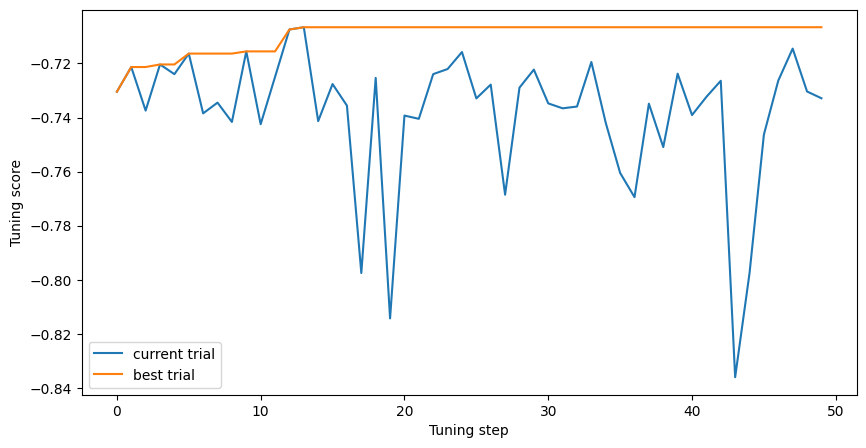

In [113]:
# tuning logs
gbt_model_tuning_logs = gbt.plot_tuning_logs()

Variable Importance

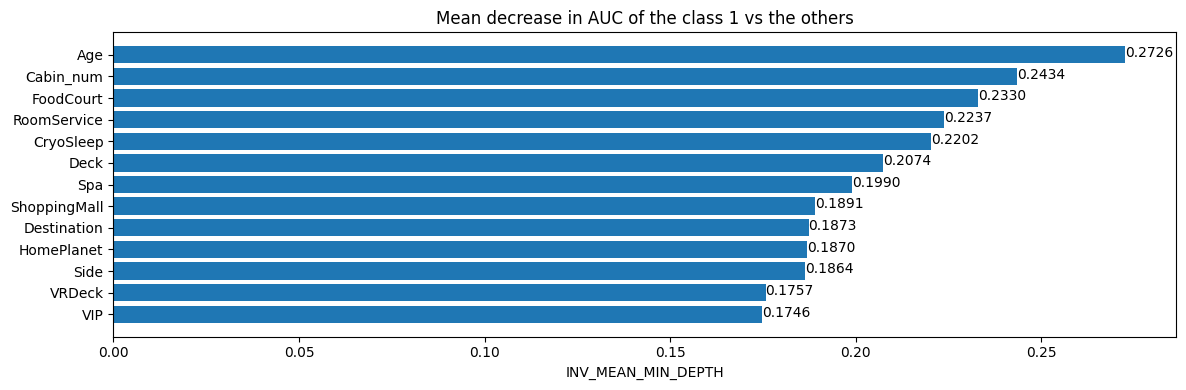

In [114]:
# variable importance
gbt_model_variable_importances = gbt.plot_variable_importances()

Features that were not important were removed from `select_features` which improved model accuracy

### Export output as csv for submission

In [115]:
# os.makedirs(output_path, exist_ok=True) 
# gbt_model_output.to_csv(os.path.join(output_path, "tf_gbt.csv"),index=False)